In [2]:
import pandas as pd
import numpy as np
import os
import io
import s3fs
import re
import warnings

# Ignore warning
warnings.filterwarnings('ignore')

exec(open('0_KPI_functions.py').read())
exec(open('utils_stat_desc.py').read())

# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

companies = {'musee' : ['1', '2', '3', '4'], # , '101'
            'sport': ['5', '6', '7', '8', '9'],
            'musique' : ['10', '11', '12', '13', '14']}


type_of_activity = input('Choisissez le type de compagnie : sport ? musique ? musee ?')
list_of_comp = companies[type_of_activity] 

# Load files
customer, campaigns_kpi, campaigns_brut, tickets, products = load_files(list_of_comp)

# Identify anonymous customer for each company and remove them from our datasets
outlier_list = outlier_detection(tickets, list_of_comp)

# Identify valid customer (customer who bought tickets after starting date or received mails after starting date)
customer_valid_list = valid_customer_detection(products, campaigns_brut)

databases = [customer, campaigns_kpi, campaigns_brut, tickets, products]

for dataset in databases:
    dataset['customer_id'] = dataset['customer_id'].apply(lambda x: remove_elements(x, outlier_list))# remove outlier
    dataset = dataset[dataset['customer_id'].isin(customer_valid_list)] # keep only valid customer
    #print(f'shape of {dataset} : ', dataset.shape)

# Identify customer who bought during the period of y
customer_target_period = identify_purchase_during_target_periode(products)
customer['has_purchased_target_period'] = np.where(customer['customer_id'].isin(customer_target_period), 1, 0)

Choisissez le type de compagnie : sport ? musique ? musee ? sport


File path :  projet-bdc2324-team1/0_Input/Company_5/customerplus_cleaned.csv


PermissionError: Forbidden

In [ ]:
customer.head()

In [ ]:
tickets.head()

In [ ]:
tickets.groupby('number_company')['achat_internet'].sum()

In [ ]:
tickets.columns

In [ ]:
customer

In [ ]:
print(len(tickets['customer_id']))
print(len(tickets['customer_id'].unique()))

In [ ]:
has_purchased = customer.groupby('number_company').agg({
    'has_purchased_target_period' : 'sum',
    'customer_id' : 'nunique'})
has_purchased

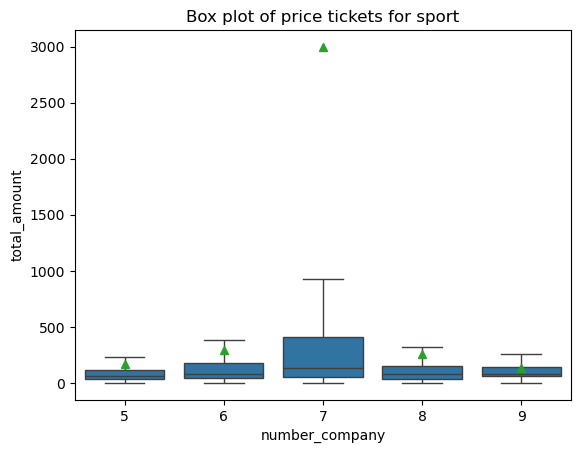

ClientError: An error occurred (InvalidAccessKeyId) when calling the PutObject operation: The Access Key Id you provided does not exist in our records.

<Figure size 640x480 with 0 Axes>

In [35]:
exec(open('utils_stat_desc.py').read())
box_plot_price_tickets(tickets, type_of_activity)